### If GPA is not installed:

In [ ]:
!pip install git+https://github.com/rsautter/GPA

### Libraries

In [1]:
from GPA import GPA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [3]:
ga = GPA(0.03)
ga.version()

b'GPA - 3.5'

# Without Noise

(3001, 128, 128)


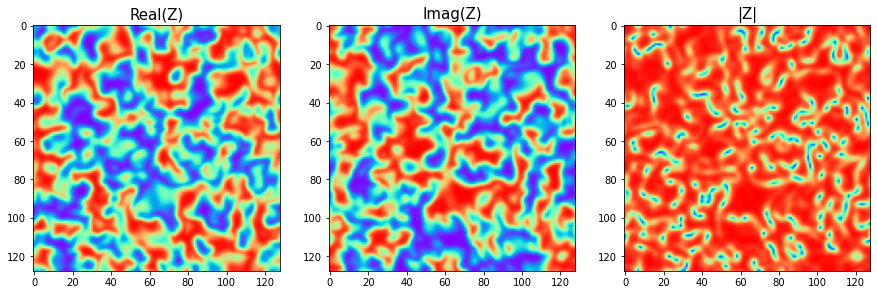

In [52]:
data = np.load("data/withoutNoise/data.npy")
times = np.load("data/withoutNoise/times.npy")

print(data.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.real(data[100]),cmap='rainbow')
plt.title("Real(Z)",fontsize=15)
plt.subplot(1,3,2)
plt.imshow(np.imag(data[100]),cmap='rainbow')
plt.title("Imag(Z)",fontsize=15)
plt.subplot(1,3,3)
plt.imshow(np.abs(data[100]),cmap='rainbow')
plt.title("|Z|",fontsize=15)
plt.show()

In [5]:
rz,iz,mz = [],[],[]
#for i in tqdm(range(data.shape[0])):
for i in tqdm(range(0,3000)):
    rz.append(ga(np.real(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
    iz.append(ga(np.imag(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
    mz.append(ga(np.abs(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
    #print(rz[-1])
rz,iz,mz = pd.DataFrame(rz),pd.DataFrame(iz),pd.DataFrame(mz)

100%|█████████████████████████████████████| 3000/3000 [1:11:56<00:00,  1.44s/it]


In [69]:
max(times)

149.9605359874542

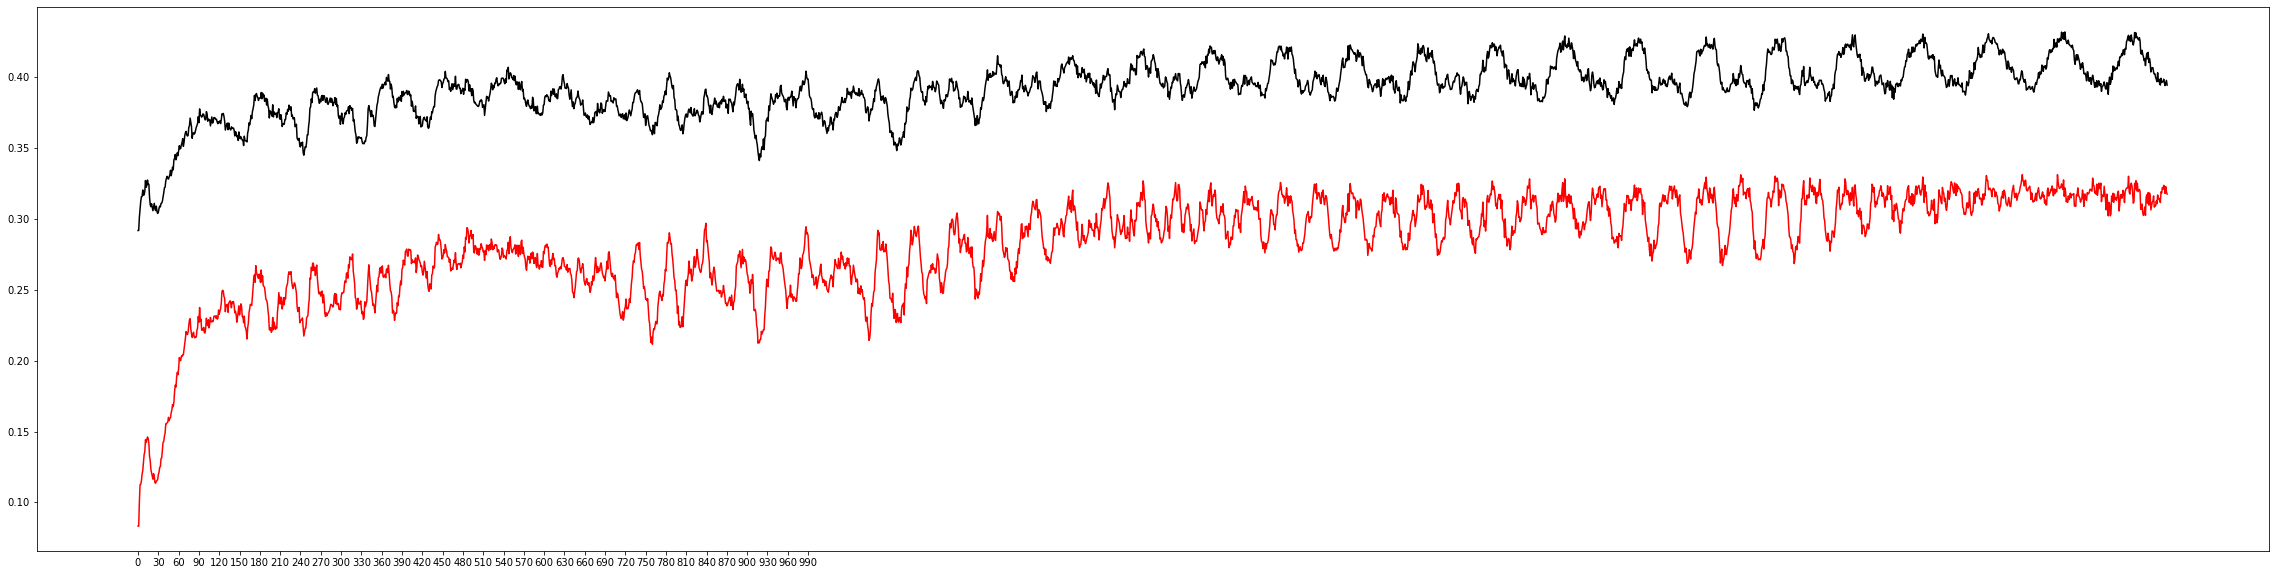

In [6]:
plt.figure(figsize=(40,10))
#plt.plot(times, rz["G1"][:-1],color='b')
plt.plot(rz["G2"][:-1],color='r',label=r"$G_2$")
plt.plot(rz["G3"][:-1],color='k',label=r"$G_3$")
#plt.legend(fontsize = legendSize)
plt.xticks(np.arange(0,1000,30))
plt.show()
#plt.xlim(0,90)

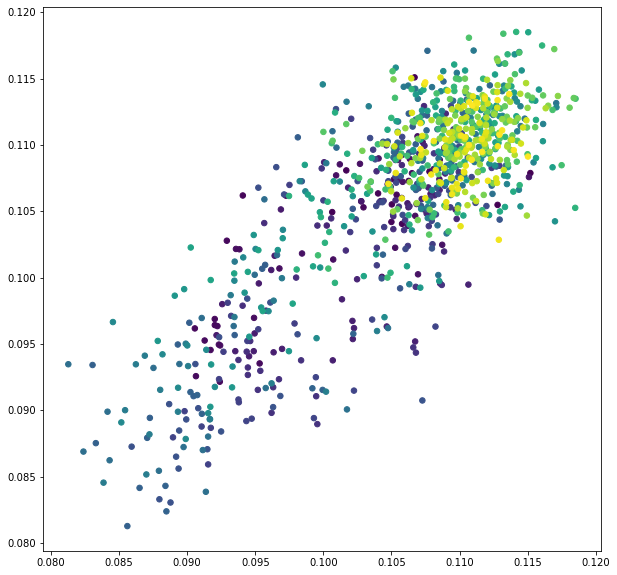

In [41]:
def phasePortrait(ts,step=1):
    ts1, ts2 = ts.copy()[:-step], ts.copy()[step:]
    times = np.arange(len(ts1))
    plt.scatter(ts1,ts2,s=30,c=times)
    #plt.plot(ts1,ts2,lw=0.5)
plt.figure(figsize=(10,10))
phasePortrait(rz["G2"][:-1],50)
plt.show()

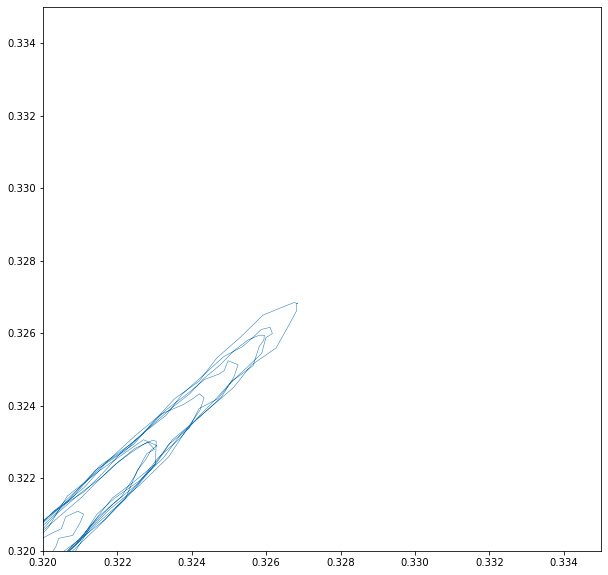

In [76]:
from scipy.interpolate import CubicSpline
def smoothPhasePortrait(ts,step=1):
    times = np.arange(len(ts[:-1]))
    plt.plot(ts[:-1],ts[1:],lw=0.5)
    
plt.figure(figsize=(10,10))
smoothPhasePortrait(rz["G3"].rolling(40).mean().dropna(),1)
plt.xlim(0.32,0.335)
plt.ylim(0.32,0.335)
plt.show()

In [61]:
rz["G3"].rolling(20).mean().dropna()

19     0.320067
20     0.318972
21     0.318412
22     0.318232
23     0.317533
         ...   
995    0.286720
996    0.285552
997    0.284611
998    0.283711
999    0.283312
Name: G3, Length: 981, dtype: float64

In [7]:
rz.to_csv("data/withoutNoise/gpa/real.csv", index=False)
iz.to_csv("data/withoutNoise/gpa/imag.csv", index=False)
mz.to_csv("data/withoutNoise/gpa/mod.csv", index=False)

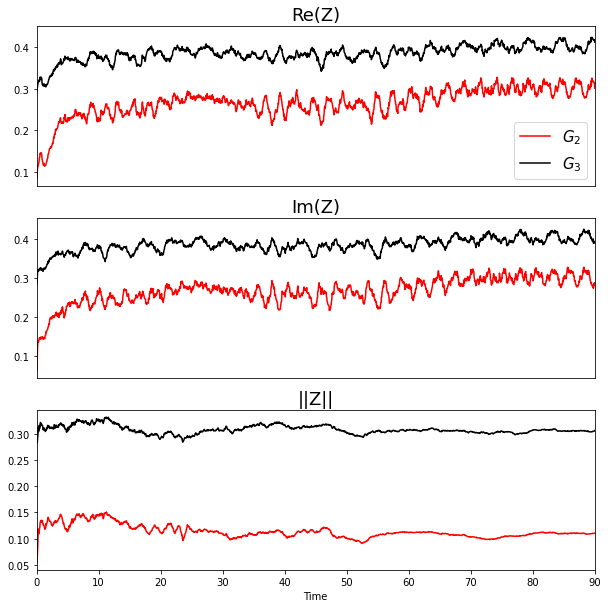

In [9]:
legendSize = 15
titleSize = 18

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("Re(Z)",fontsize=titleSize)
#plt.plot(times, rz["G1"][:-1],color='b')
plt.plot(times, rz["G2"],color='r',label=r"$G_2$")
plt.plot(times, rz["G3"],color='k',label=r"$G_3$")
plt.legend(fontsize = legendSize)
plt.xticks([])
plt.xlim(0,90)

plt.subplot(3,1,2)
plt.title("Im(Z)",fontsize=titleSize)
#plt.plot(times, iz["G1"][:-1],color='b')
plt.plot(times, iz["G2"],color='r')
plt.plot(times, iz["G3"],color='k')
plt.xticks([])
plt.xlim(0,90)

plt.subplot(3,1,3)
plt.title("||Z||",fontsize=titleSize)
#plt.plot(times, mz["G1"][:-1],color='b')
plt.plot(times, mz["G2"],color='r')
plt.plot(times, mz["G3"],color='k')
plt.xlim(0,90)
plt.xlabel("Time")

plt.show()


In [2]:
data = np.load("data/withoutNoise/data.npy")
times = np.load("data/withoutNoise/times.npy")
rz = pd.read_csv("data/withoutNoise/gpa/real.csv")
iz = pd.read_csv("data/withoutNoise/gpa/imag.csv")
mz = pd.read_csv("data/withoutNoise/gpa/mod.csv")

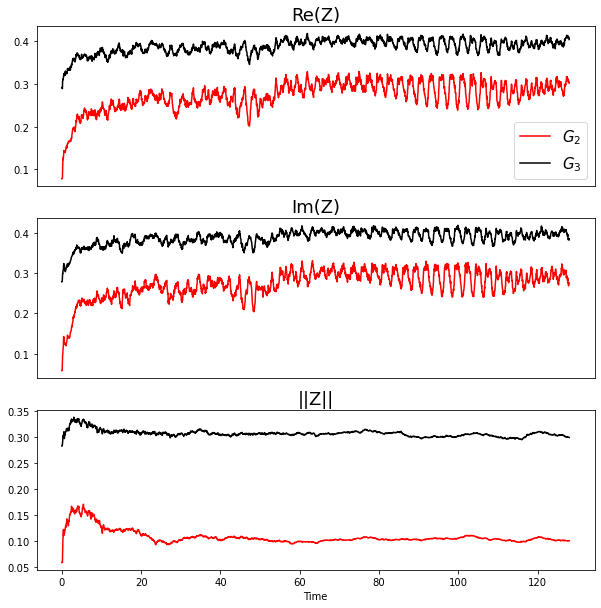

In [3]:
legendSize = 15
titleSize = 18

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("Re(Z)",fontsize=titleSize)
#plt.plot(times, rz["G1"][:-1],color='b')
plt.plot(times, rz["G2"][:-1],color='r',label=r"$G_2$")
plt.plot(times, rz["G3"][:-1],color='k',label=r"$G_3$")
plt.legend(fontsize = legendSize)
plt.xticks([])
#plt.xlim(0,90)

plt.subplot(3,1,2)
plt.title("Im(Z)",fontsize=titleSize)
#plt.plot(times, iz["G1"][:-1],color='b')
plt.plot(times, iz["G2"][:-1],color='r')
plt.plot(times, iz["G3"][:-1],color='k')
plt.xticks([])
#plt.xlim(0,90)

plt.subplot(3,1,3)
plt.title("||Z||",fontsize=titleSize)
#plt.plot(times, mz["G1"][:-1],color='b')
plt.plot(times, mz["G2"][:-1],color='r')
plt.plot(times, mz["G3"][:-1],color='k')
#plt.xlim(0,90)
plt.xlabel("Time")

plt.show()


# Additive Noise

(3001, 128, 128)


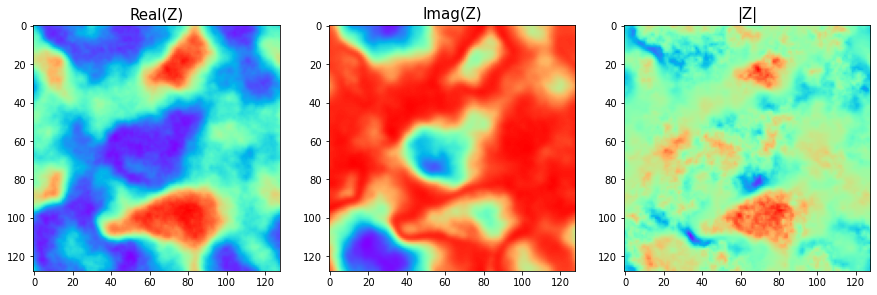

In [10]:
data = np.load("data/additiveNoise/data.npy")
times = np.load("data/additiveNoise/times.npy")

print(data.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.real(data[1000]),cmap='rainbow')
plt.title("Real(Z)",fontsize=15)
plt.subplot(1,3,2)
plt.imshow(np.imag(data[1000]),cmap='rainbow')
plt.title("Imag(Z)",fontsize=15)
plt.subplot(1,3,3)
plt.imshow(np.abs(data[1000]),cmap='rainbow')
plt.title("|Z|",fontsize=15)
plt.show()

In [11]:
rz,iz,mz = [],[],[]
for i in tqdm(range(data.shape[0])):
    rz.append(ga(np.real(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
    iz.append(ga(np.imag(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
    mz.append(ga(np.abs(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
rz,iz,mz = pd.DataFrame(rz),pd.DataFrame(iz),pd.DataFrame(mz)

100%|███████████████████████████████████████| 3001/3001 [46:11<00:00,  1.08it/s]


In [12]:
rz.to_csv("data/additiveNoise/gpa/real.csv", index=False)
iz.to_csv("data/additiveNoise/gpa/imag.csv", index=False)
mz.to_csv("data/additiveNoise/gpa/mod.csv", index=False)

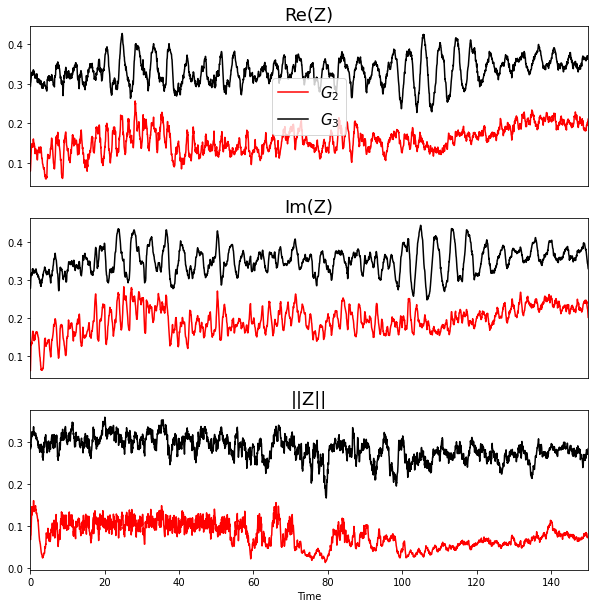

In [13]:
legendSize = 15
titleSize = 18

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("Re(Z)",fontsize=titleSize)
#plt.plot(times, rz["G1"][:-1],color='b')
plt.plot(times, rz["G2"][:-1],color='r',label=r"$G_2$")
plt.plot(times, rz["G3"][:-1],color='k',label=r"$G_3$")
plt.legend(fontsize = legendSize)
plt.xticks([])
plt.xlim(0,max(times))

plt.subplot(3,1,2)
plt.title("Im(Z)",fontsize=titleSize)
#plt.plot(times, iz["G1"][:-1],color='b')
plt.plot(times, iz["G2"][:-1],color='r')
plt.plot(times, iz["G3"][:-1],color='k')
plt.xticks([])
plt.xlim(0,max(times))

plt.subplot(3,1,3)
plt.title("||Z||",fontsize=titleSize)
#plt.plot(times, mz["G1"][:-1],color='b')
plt.plot(times, mz["G2"][:-1],color='r')
plt.plot(times, mz["G3"][:-1],color='k')
plt.xlim(0,max(times))
plt.xlabel("Time")

plt.show()


# Multiplicative Noise

(3001, 128, 128)


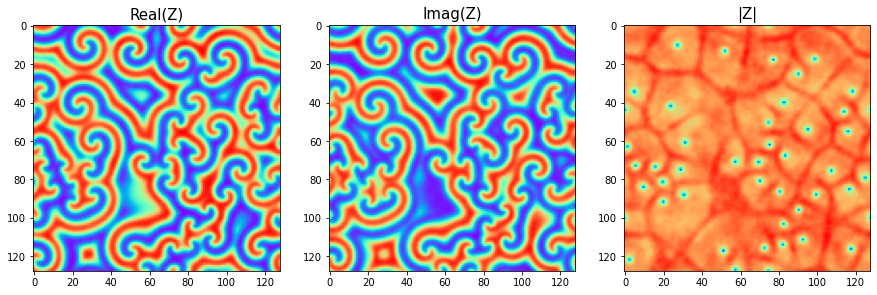

In [14]:
data = np.load("data/multiplicativeNoise/data.npy")
times = np.load("data/multiplicativeNoise/times.npy")

print(data.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.real(data[1000]),cmap='rainbow')
plt.title("Real(Z)",fontsize=15)
plt.subplot(1,3,2)
plt.imshow(np.imag(data[1000]),cmap='rainbow')
plt.title("Imag(Z)",fontsize=15)
plt.subplot(1,3,3)
plt.imshow(np.abs(data[1000]),cmap='rainbow')
plt.title("|Z|",fontsize=15)
plt.show()

In [15]:
rz,iz,mz = [],[],[]
for i in tqdm(range(data.shape[0])):
    rz.append(ga(np.real(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
    iz.append(ga(np.imag(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
    mz.append(ga(np.abs(data[i]),moment=["G1","G1_Classic","G2","G3","G4"]))
rz,iz,mz = pd.DataFrame(rz),pd.DataFrame(iz),pd.DataFrame(mz)

100%|█████████████████████████████████████| 3001/3001 [1:10:25<00:00,  1.41s/it]


In [16]:
rz.to_csv("data/multiplicativeNoise/gpa/real.csv", index=False)
iz.to_csv("data/multiplicativeNoise/gpa/imag.csv", index=False)
mz.to_csv("data/multiplicativeNoise/gpa/mod.csv", index=False)

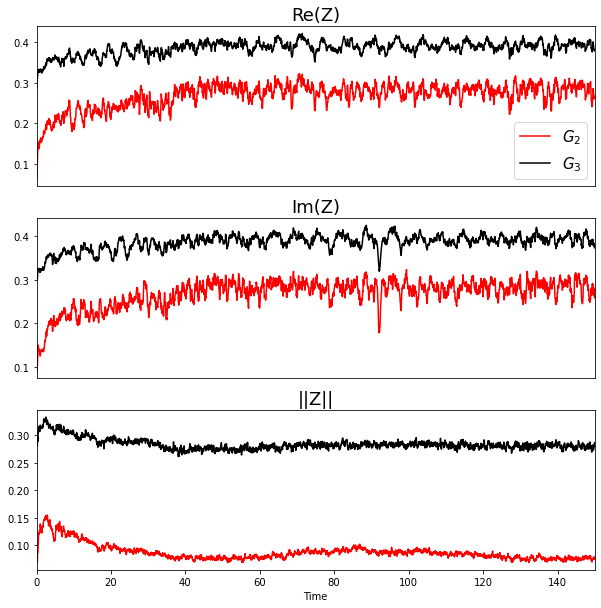

In [17]:
legendSize = 15
titleSize = 18

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("Re(Z)",fontsize=titleSize)
#plt.plot(times, rz["G1"][:-1],color='b')
plt.plot(times, rz["G2"][:-1],color='r',label=r"$G_2$")
plt.plot(times, rz["G3"][:-1],color='k',label=r"$G_3$")
plt.legend(fontsize = legendSize)
plt.xticks([])
plt.xlim(0,max(times))

plt.subplot(3,1,2)
plt.title("Im(Z)",fontsize=titleSize)
#plt.plot(times, iz["G1"][:-1],color='b')
plt.plot(times, iz["G2"][:-1],color='r')
plt.plot(times, iz["G3"][:-1],color='k')
plt.xticks([])
plt.xlim(0,max(times))

plt.subplot(3,1,3)
plt.title("||Z||",fontsize=titleSize)
#plt.plot(times, mz["G1"][:-1],color='b')
plt.plot(times, mz["G2"][:-1],color='r')
plt.plot(times, mz["G3"][:-1],color='k')
plt.xlim(0,max(times))
plt.xlabel("Time")

plt.show()


# Real Part Comparison

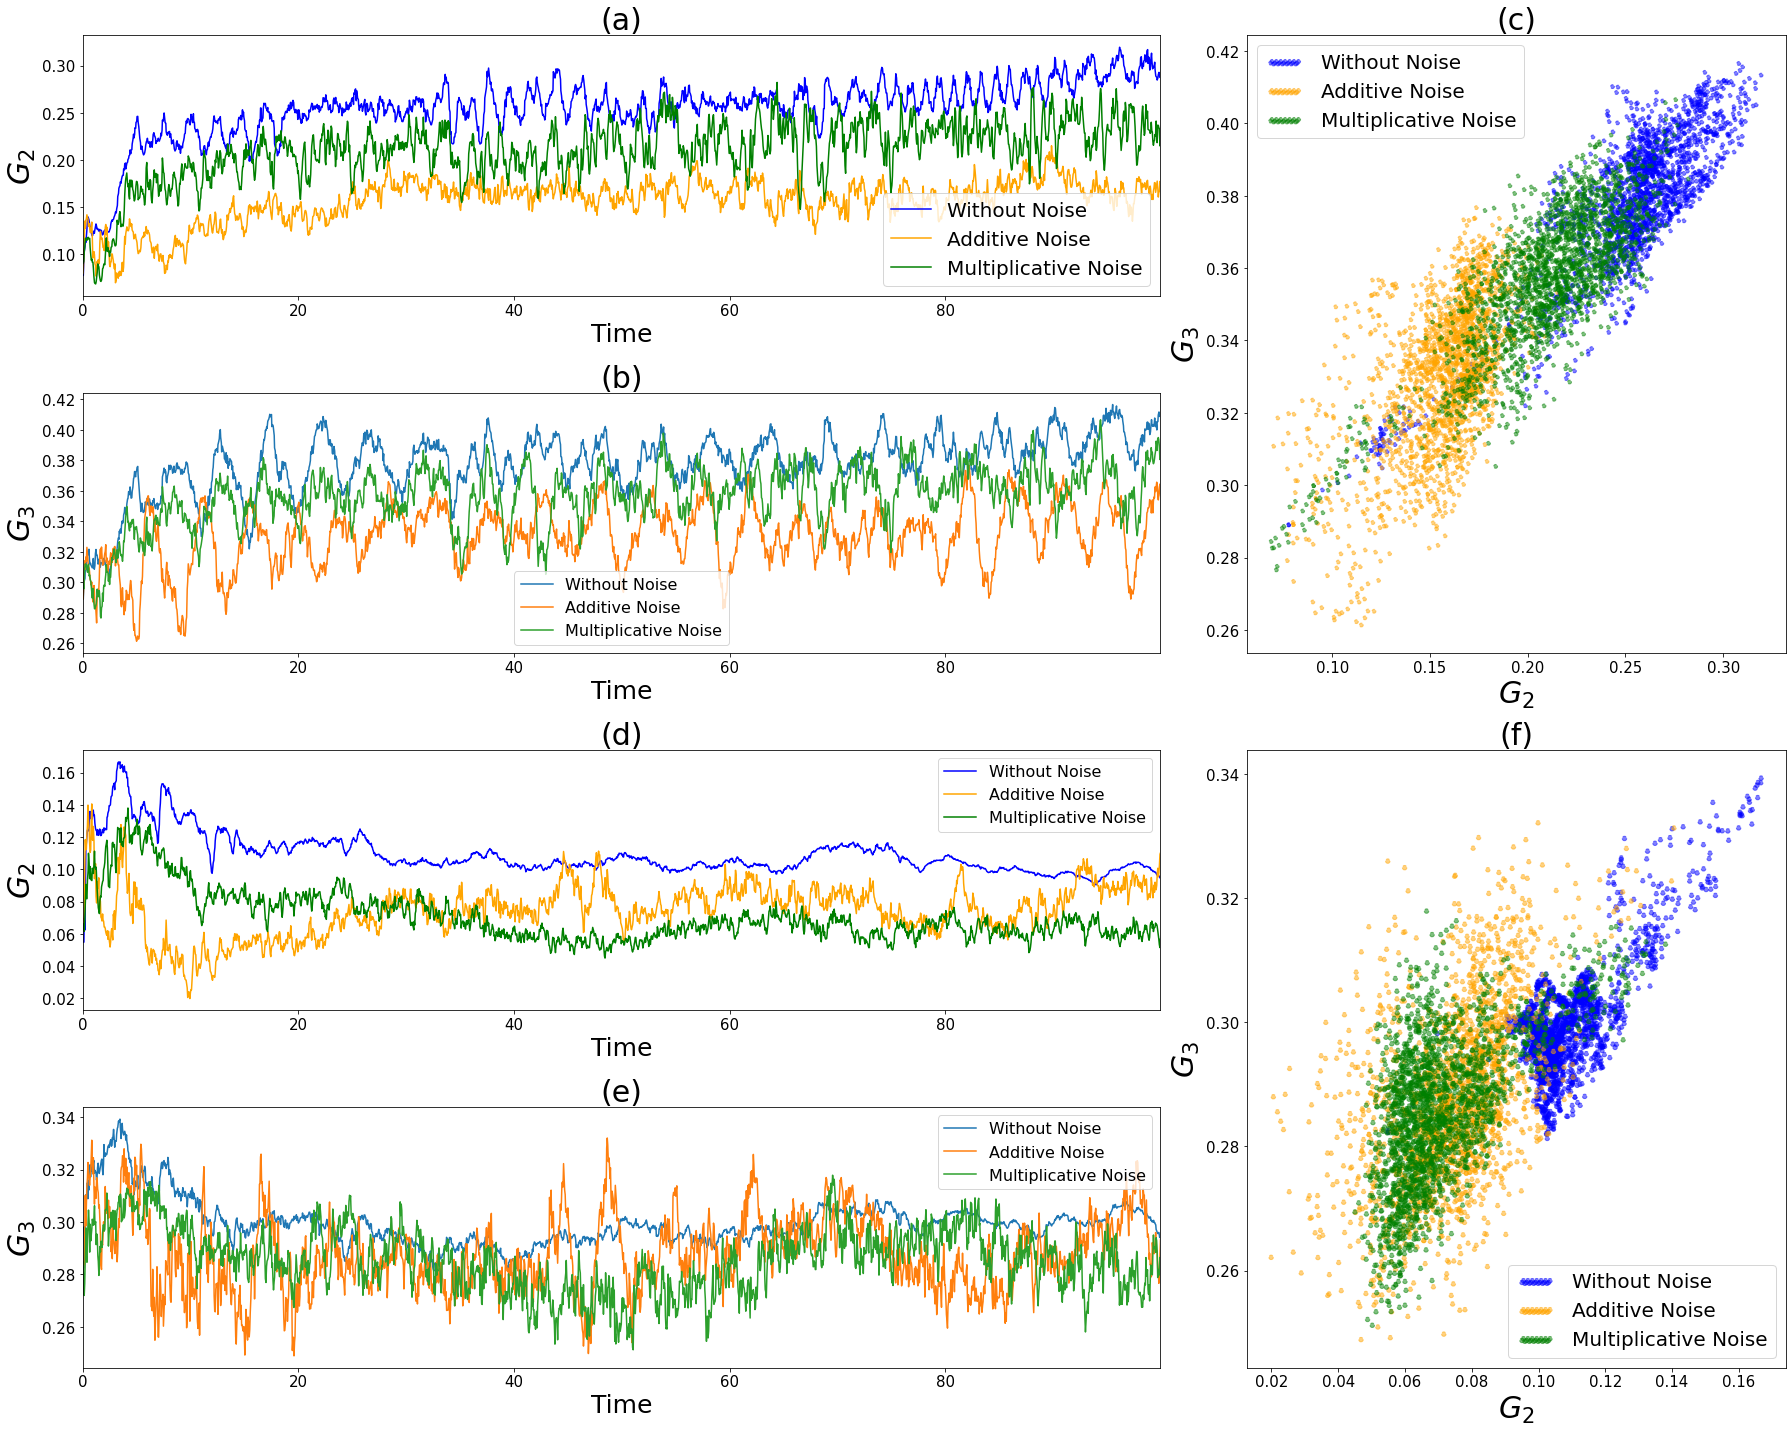

In [23]:
from matplotlib.gridspec import GridSpec as GridSpec


add = pd.read_csv("data/additiveNoise/gpa/real.csv")
tadd = np.load("data/additiveNoise/times.npy")

mul = pd.read_csv("data/multiplicativeNoise/gpa/real.csv")
tmul= np.load("data/multiplicativeNoise/times.npy")

without = pd.read_csv("data/withoutNoise/gpa/real.csv")
twithout = np.load("data/withoutNoise/times.npy")

maxT = np.max(tadd)


gs = GridSpec(4,2,width_ratios=[2,1])

plt.figure(figsize=(25,20))

plt.subplot(gs[0,0])
plt.plot(twithout, without["G2"][:-1],label="Without Noise", ls= '-',color='blue')
plt.plot(tadd, add["G2"][:-1],label="Additive Noise", ls= '-',color='orange')
plt.plot(tmul, mul["G2"][:-1],label="Multiplicative Noise", ls= '-',color='green')
plt.legend(fontsize=20)
plt.title("(a)", fontsize=30)
plt.xlabel("Time",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(r"$G_2$",fontsize=30)
plt.xlim(0,maxT)

plt.subplot(gs[0:2,1])
plt.title("(c)", fontsize=30)
plt.scatter(without["G2"][:-1], without["G3"][:-1],label="Without Noise", ls= '--',color='blue',alpha=0.5,s=15)
plt.scatter(add["G2"][:-1], add["G3"][:-1],label="Additive Noise", ls= '--',color='orange',alpha=0.5,s=15)
plt.scatter(mul["G2"][:-1], mul["G3"][:-1],label="Multiplicative Noise", ls= '--',color='green',alpha=0.5,s=15)
plt.xlabel(r"$G_2$",fontsize=30)
plt.ylabel(r"$G_3$",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,scatterpoints=20)


plt.subplot(gs[1,0])
plt.plot(twithout, without["G3"][:-1],label="Without Noise", ls= '-')
plt.plot(tadd, add["G3"][:-1],label="Additive Noise", ls= '-')
plt.plot(tmul, mul["G3"][:-1],label="Multiplicative Noise", ls= '-')
plt.legend(fontsize=16)
plt.title("(b)", fontsize=30)
plt.xlim(0,maxT)
plt.xlabel("Time",fontsize=25)
plt.ylabel(r"$G_3$",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

add = pd.read_csv("data/additiveNoise/gpa/mod.csv")
tadd = np.load("data/additiveNoise/times.npy")

mul = pd.read_csv("data/multiplicativeNoise/gpa/mod.csv")
tmul= np.load("data/multiplicativeNoise/times.npy")

without = pd.read_csv("data/withoutNoise/gpa/mod.csv")
twithout = np.load("data/withoutNoise/times.npy")

plt.subplot(gs[2,0])
plt.plot(twithout, without["G2"][:-1],label="Without Noise", ls= '-',color='blue')
plt.plot(tadd, add["G2"][:-1],label="Additive Noise", ls= '-',color='orange')
plt.plot(tmul, mul["G2"][:-1],label="Multiplicative Noise", ls= '-',color='green')
plt.legend(fontsize=16,loc=1)
plt.title("(d)", fontsize=30)
plt.xlabel("Time",fontsize=25)
plt.ylabel(r"$G_2$",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(0,maxT)

plt.subplot(gs[3,0])
plt.plot(twithout, without["G3"][:-1],label="Without Noise", ls= '-')
plt.plot(tadd, add["G3"][:-1],label="Additive Noise", ls= '-')
plt.plot(tmul, mul["G3"][:-1],label="Multiplicative Noise", ls= '-')
plt.legend(fontsize=16)
plt.title("(e)", fontsize=30)
plt.xlim(0,maxT)
plt.xlabel("Time",fontsize=25)
plt.ylabel(r"$G_3$",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(gs[2:4,1])
plt.title("(f)", fontsize=30)
plt.scatter(without["G2"][:-1], without["G3"][:-1],label="Without Noise", ls= '--',color='blue',alpha=0.5,s=20)
plt.scatter(add["G2"][:-1], add["G3"][:-1],label="Additive Noise", ls= '--',color='orange',alpha=0.5,s=20)
plt.scatter(mul["G2"][:-1], mul["G3"][:-1],label="Multiplicative Noise", ls= '--',color='green',alpha=0.5,s=20)
plt.xlabel(r"$G_2$",fontsize=30)
plt.ylabel(r"$G_3$",fontsize=30)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,scatterpoints=20)



plt.tight_layout()
plt.savefig("AllGPARe_comp.png",dpi=300)
plt.show()

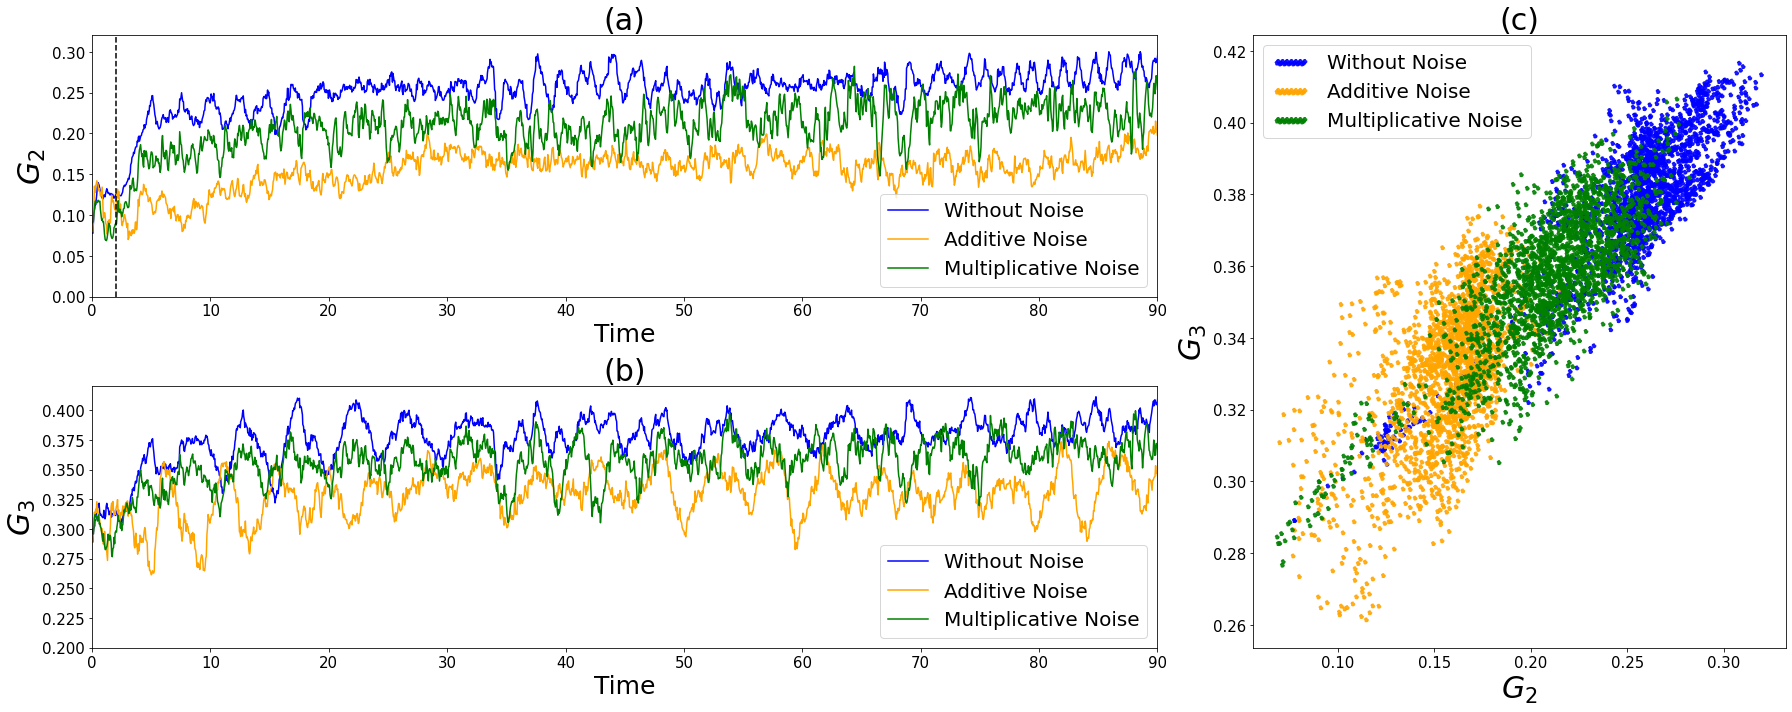

In [3]:
from matplotlib.gridspec import GridSpec as GridSpec


add = pd.read_csv("data/additiveNoise/gpa/real.csv")
tadd = np.load("data/additiveNoise/times.npy")

mul = pd.read_csv("data/multiplicativeNoise/gpa/real.csv")
tmul= np.load("data/multiplicativeNoise/times.npy")

without = pd.read_csv("data/withoutNoise/gpa/real.csv")
twithout = np.load("data/withoutNoise/times.npy")

maxT = 90


gs = GridSpec(2,2,width_ratios=[2,1])

plt.figure(figsize=(25,10))

plt.subplot(gs[0,0])
plt.plot(twithout, without["G2"][:-1],label="Without Noise", ls= '-',color='blue')
plt.plot(tadd, add["G2"][:-1],label="Additive Noise", ls= '-',color='orange')
plt.plot(tmul, mul["G2"][:-1],label="Multiplicative Noise", ls= '-',color='green')
plt.legend(fontsize=20,loc=4)
plt.title("(a)", fontsize=30)
plt.xlabel("Time",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(r"$G_2$",fontsize=30)
plt.xlim(0,maxT)
plt.ylim(0.0,0.32)
plt.axvline(2.0,color='k',ls ='--')


plt.subplot(gs[0:2,1])
plt.title("(c)", fontsize=30)
plt.scatter(without["G2"][:-1], without["G3"][:-1],label="Without Noise", ls= '--',color='blue',alpha=0.9,s=15)
plt.scatter(add["G2"][:-1], add["G3"][:-1],label="Additive Noise", ls= '--',color='orange',alpha=0.9,s=15)
plt.scatter(mul["G2"][:-1], mul["G3"][:-1],label="Multiplicative Noise", ls= '--',color='green',alpha=0.9,s=15)
plt.xlabel(r"$G_2$",fontsize=30)
plt.ylabel(r"$G_3$",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,scatterpoints=20)


plt.subplot(gs[1,0])
plt.plot(twithout, without["G3"][:-1],label="Without Noise", ls= '-',color='blue')
plt.plot(tadd, add["G3"][:-1],label="Additive Noise", ls= '-',color='orange')
plt.plot(tmul, mul["G3"][:-1],label="Multiplicative Noise", ls= '-',color='green')
#plt.legend(fontsize=20,loc=4)
plt.title("(b)", fontsize=30)
plt.xlim(0,maxT)
plt.xlabel("Time",fontsize=25)
plt.ylabel(r"$G_3$",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.20,0.42)

add = pd.read_csv("data/additiveNoise/gpa/mod.csv")
tadd = np.load("data/additiveNoise/times.npy")

mul = pd.read_csv("data/multiplicativeNoise/gpa/mod.csv")
tmul= np.load("data/multiplicativeNoise/times.npy")

without = pd.read_csv("data/withoutNoise/gpa/mod.csv")
twithout = np.load("data/withoutNoise/times.npy")

plt.xlim(0,maxT)
plt.tight_layout()
plt.savefig("AllGPARe_comp.png",dpi=300,bbox_inches='tight')
plt.show()

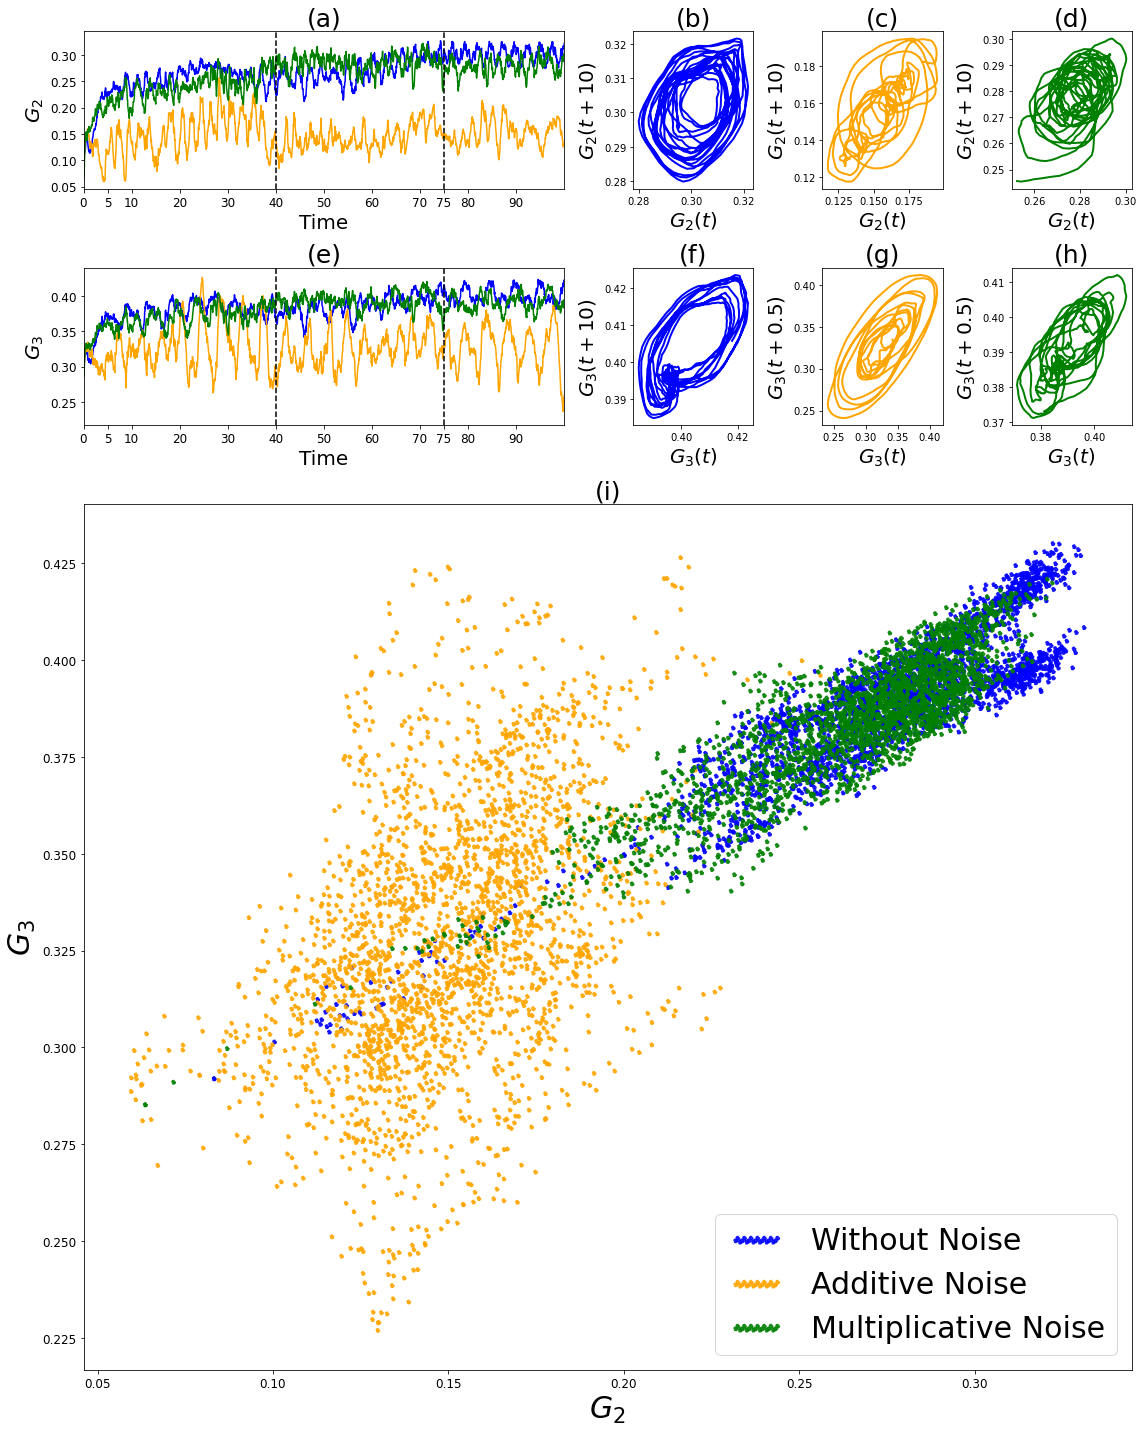

In [26]:
from matplotlib.gridspec import GridSpec as GridSpec

def smoothPhasePortrait(ts,step=1,smooth=20,color='k'):
    ts2  = ts.copy()
    ts2 = ts2.rolling(smooth).mean().dropna()
    plt.plot(ts2[:-step],ts2[step:],lw=2,color=color)
    
add = pd.read_csv("data/additiveNoise/gpa/real.csv")
tadd = np.load("data/additiveNoise/times.npy")

mul = pd.read_csv("data/multiplicativeNoise/gpa/real.csv")
tmul= np.load("data/multiplicativeNoise/times.npy")

without = pd.read_csv("data/withoutNoise/gpa/real.csv")
twithout = np.load("data/withoutNoise/times.npy")

maxT = 100
titleS = 25


gs = GridSpec(3,4,height_ratios=[1,1,5.5],width_ratios=[4,1,1,1])

plt.figure(figsize=(16,20))

plt.subplot(gs[0,0])
plt.plot(twithout[:2560], without["G2"][:2560],label="Without Noise", ls= '-',color='blue')
plt.plot(tadd[:2560], add["G2"][:2560],label="Additive Noise", ls= '-',color='orange')
plt.plot(tmul[:2560], mul["G2"][:2560],label="Multiplicative Noise", ls= '-',color='green')
#plt.axvline(5,color='k', ls ='--')
plt.axvline(75,color='k', ls ='--')
plt.axvline(40,color='k', ls ='--')
xs = np.arange(0,100,10)
xs = np.concatenate((xs,[5,75]))
plt.xticks(xs)
#plt.legend(fontsize=12)
plt.title("(a)", fontsize=titleS)
plt.xlabel("Time",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r"$G_2$",fontsize=20)
plt.xlim(0,maxT)

plt.subplot(gs[0,1])
smoothPhasePortrait(without["G2"][1500:2560],step=10,color='blue')
plt.xlabel(r"$G_2(t)$",fontsize=20)
plt.ylabel(r"$G_2(t+10)$",fontsize=20)
plt.title("(b)", fontsize=titleS)

plt.subplot(gs[0,2])
smoothPhasePortrait(add["G2"][1500:2560],step=10,color='orange')
plt.xlabel(r"$G_2(t)$",fontsize=20)
plt.ylabel(r"$G_2(t+10)$",fontsize=20)
plt.title("(c)", fontsize=titleS)

plt.subplot(gs[0,3])
smoothPhasePortrait(mul["G2"][1500:2560],step=10,color='green')
plt.xlabel(r"$G_2(t)$",fontsize=20)
plt.ylabel(r"$G_2(t+10)$",fontsize=20)
plt.title("(d)", fontsize=titleS)


plt.subplot(gs[2,:])
plt.title("(i)", fontsize=titleS)
plt.scatter(without["G2"][:2560], without["G3"][:2560],label="Without Noise", ls= '--',color='blue',alpha=0.9,s=15)
plt.scatter(add["G2"][:2560], add["G3"][:2560],label="Additive Noise", ls= '--',color='orange',alpha=0.9,s=15)
plt.scatter(mul["G2"][:2560], mul["G3"][:2560],label="Multiplicative Noise", ls= '--',color='green',alpha=0.9,s=15)

plt.xlabel(r"$G_2$",fontsize=30)
plt.ylabel(r"$G_3$",fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=30,scatterpoints=20)


plt.subplot(gs[1,0])
plt.plot(twithout[:2560], without["G3"][:2560],label="Without Noise", ls= '-',color='blue')
plt.plot(tadd[:2560], add["G3"][:2560],label="Additive Noise", ls= '-',color='orange')
plt.plot(tmul[:2560], mul["G3"][:2560],label="Multiplicative Noise", ls= '-',color='green')
#plt.axvline(5,color='k', ls ='--')
plt.axvline(75,color='k', ls ='--')
plt.axvline(40,color='k', ls ='--')
xs = np.arange(0,100,10)
xs = np.concatenate((xs,[5,75]))
plt.xticks(xs)
#plt.legend(fontsize=12)
plt.title("(e)", fontsize=titleS)
plt.xlim(0,maxT)
plt.xlabel("Time",fontsize=20)
plt.ylabel(r"$G_3$",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,maxT)
#plt.ylim(0.20,0.42)

plt.subplot(gs[1,1])
smoothPhasePortrait(without["G3"][1500:2560],step=10,color='blue')
plt.xlabel(r"$G_3(t)$",fontsize=20)
plt.ylabel(r"$G_3(t+10)$",fontsize=20)
plt.title("(f)", fontsize=titleS)

plt.subplot(gs[1,2])
smoothPhasePortrait(add["G3"][1500:2560],step=10,color='orange')
plt.xlabel(r"$G_3(t)$",fontsize=20)
plt.ylabel(r"$G_3(t+0.5)$",fontsize=20)
plt.title("(g)", fontsize=titleS)

plt.subplot(gs[1,3])
smoothPhasePortrait(mul["G3"][1500:2560],step=10,color='green')
plt.xlabel(r"$G_3(t)$",fontsize=20)
plt.ylabel(r"$G_3(t+0.5)$",fontsize=20)
plt.title("(h)", fontsize=titleS)

add = pd.read_csv("data/additiveNoise/gpa/mod.csv")
tadd = np.load("data/additiveNoise/times.npy")

mul = pd.read_csv("data/multiplicativeNoise/gpa/mod.csv")
tmul= np.load("data/multiplicativeNoise/times.npy")

without = pd.read_csv("data/withoutNoise/gpa/mod.csv")
twithout = np.load("data/withoutNoise/times.npy")

plt.tight_layout()
plt.savefig("AllGPARe_comp_v2.png",dpi=300,bbox_inches='tight')
plt.show()

In [5]:
from scipy.signal import periodogram

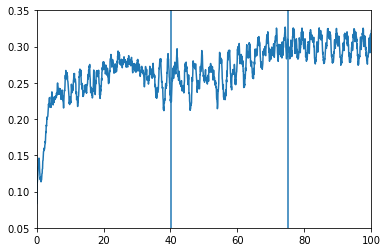

In [36]:
without = pd.read_csv("data/withoutNoise/gpa/real.csv")
twithout = np.load("data/withoutNoise/times.npy")

plt.figure()
plt.plot(twithout[:2560],without["G2"][:2560])
plt.axvline(twithout[1500])
plt.axvline(twithout[800])
plt.xlim(0,100)
plt.ylim(0.05,0.35)
plt.show()

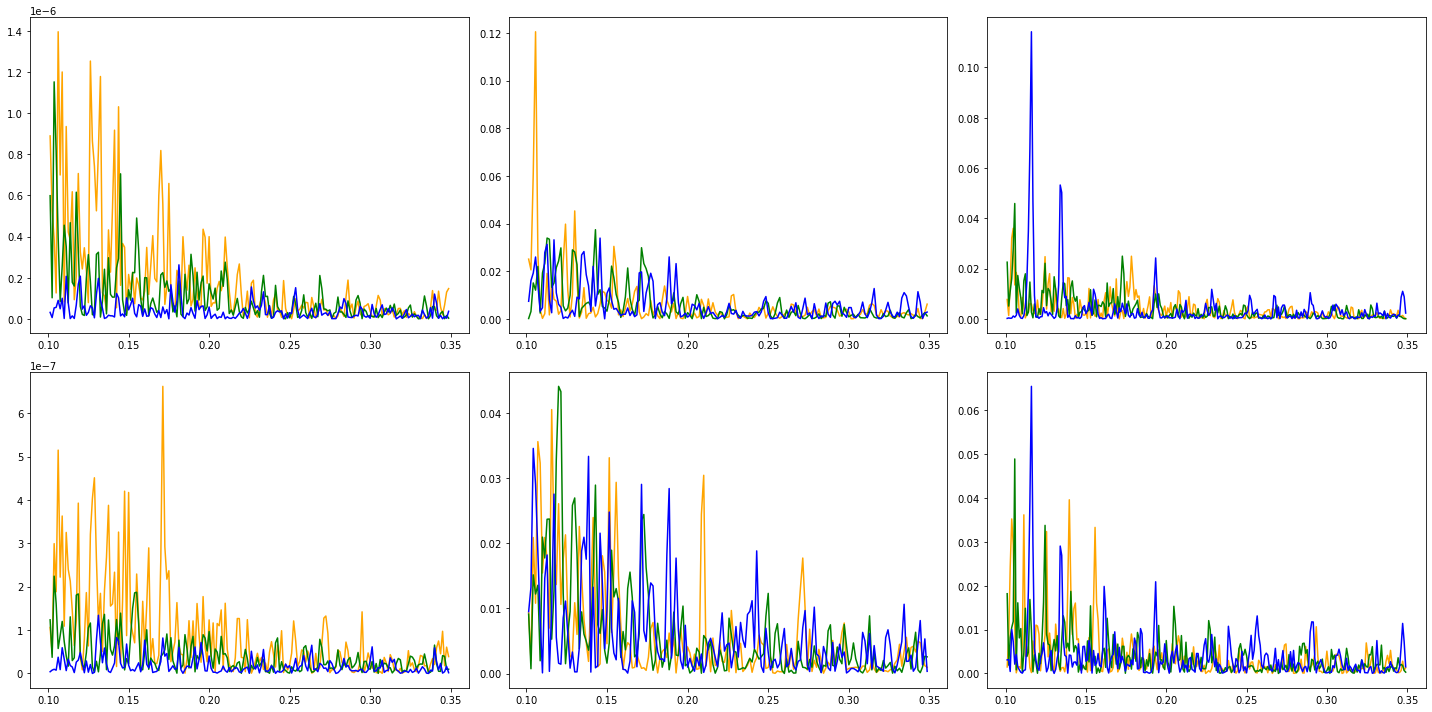

In [79]:
gs = GridSpec(nrows=2,ncols=3)

f,p = periodogram(without["G2"][:800],window='bartlett')
f,p = f[f>0.1],p[f>0.1]


without = pd.read_csv("data/withoutNoise/gpa/real.csv")
add = pd.read_csv("data/additiveNoise/gpa/real.csv")
mul = pd.read_csv("data/multiplicativeNoise/gpa/real.csv")

plt.figure(figsize=(20,10))


plt.subplot(gs[0,0])
plt.title("(a)")
f,p = periodogram(add["G2"][:800],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
plt.plot(f,p,color='orange')

f,p = periodogram(mul["G2"][:800],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
plt.plot(f,p,color='green')

f,p = periodogram(without["G2"][:800],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
plt.plot(f,p,color='b')



plt.subplot(gs[0,1])

f,p = periodogram(add["G2"][800:1500],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='orange')

f,p = periodogram(mul["G2"][800:1500],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='green')

f,p = periodogram(without["G2"][800:1500],window='bartlett')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='b')


plt.subplot(gs[0,2])


f,p = periodogram(add["G2"][1500:2560],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='orange')

f,p = periodogram(mul["G2"][1500:2560],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='green')

f,p = periodogram(without["G2"][1500:2560],window='bartlett')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='b')

###########################################

plt.subplot(gs[1,0])
f,p = periodogram(add["G3"][:800],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
plt.plot(f,p,color='orange')

f,p = periodogram(mul["G3"][:800],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
plt.plot(f,p,color='green')

f,p = periodogram(without["G3"][:800],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
plt.plot(f,p,color='b')



plt.subplot(gs[1,1])

f,p = periodogram(add["G3"][800:1500],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='orange')

f,p = periodogram(mul["G3"][800:1500],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='green')

f,p = periodogram(without["G3"][800:1500],window='bartlett')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='b')


plt.subplot(gs[1,2])


f,p = periodogram(add["G3"][1500:2560],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='orange')

f,p = periodogram(mul["G3"][1500:2560],window='bartlett',scaling='spectrum')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='green')

f,p = periodogram(without["G3"][1500:2560],window='bartlett')
f,p = f[(f>0.1) & (f<0.35)],p[(f>0.1) & (f<0.35)]
p = p/np.sum(p)
plt.plot(f,p,color='b')

plt.tight_layout()

plt.show()

In [72]:
from scipy.signal import find_peaks
f,p = periodogram(mul["G2"][1500:2560],window='bartlett')
f,p = f[f>0.1],p[f>0.1]

np.std(p)
np.max(p)

0.0008046224244424491

# Videos

In [5]:
diff = pd.read_csv("data/diffusiveNoise/gpa/real.csv")
tdiff = np.load("data/diffusiveNoise/times.npy")
data = np.load("data/diffusiveNoise/data.npy")
times = np.load("data/diffusiveNoise/times.npy")

In [ ]:
from matplotlib import animation
labelSize= 15
titleSize= 20
legendSize=15


def plotFunc(timeStep):
    print(timeStep)
    grid = plt.GridSpec(2, 3)
    
    plt.subplot(grid[0,0])
    plt.imshow(np.real(data[timeStep]),cmap='rainbow')
    plt.title("$\Re(A)$",fontsize=titleSize,fontweight="bold")

    plt.subplot(grid[0,1])
    plt.imshow(np.real(data[timeStep]),cmap='rainbow')
    plt.title("$\Im(A)$",fontsize=titleSize,fontweight="bold")

    plt.subplot(grid[0,2])
    plt.imshow(np.abs(data[timeStep]),cmap='rainbow')
    plt.title("$|A|$",fontsize=titleSize,fontweight="bold")

    plt.subplot(grid[1,:])
    plt.plot(tdiff, diff["G2"][:-1], ls= '-',color='blue',label=r"$G_2(\Re(A))$")
    plt.plot(tdiff, diff["G3"][:-1], ls= '-',color='red', label=r"$G_3(\Re(A))$")
    plt.xlim(0,max(tdiff))
    plt.title("Diffusive Noise",fontsize=titleSize,fontweight="bold")
    plt.axvspan(16,27,alpha=0.15,color='k',label='Spiral formation')
    plt.axvspan(27,np.max(tdiff),alpha=0.15,color='green',label='Final Stage')
    plt.xlabel("Time",fontsize=labelSize)
    plt.axvline(times[timeStep],lw=2,color='k')
    plt.legend()
    
figure = plt.figure(figsize=(15,10))
anim = animation.FuncAnimation(figure, func=plotFunc,frames=np.arange(0,1499), interval=20, repeat=False)
anim.save('DiffusiveGPA.mp4',dpi=250)

In [72]:
diff = pd.read_csv("data/multiplicativeNoise/gpa/real.csv")
tdiff = np.load("data/multiplicativeNoise/times.npy")
data = np.load("data/multiplicativeNoise/data.npy")
times = np.load("data/multiplicativeNoise/times.npy")

In [ ]:
from matplotlib import animation
labelSize= 15
titleSize= 20
legendSize=15


def plotFunc(timeStep):
    print(timeStep)
    grid = plt.GridSpec(2, 3)
    
    plt.subplot(grid[0,0])
    plt.imshow(np.real(data[timeStep]),cmap='rainbow')
    plt.title("$\Re(A)$",fontsize=titleSize,fontweight="bold")

    plt.subplot(grid[0,1])
    plt.imshow(np.real(data[timeStep]),cmap='rainbow')
    plt.title("$\Im(A)$",fontsize=titleSize,fontweight="bold")

    plt.subplot(grid[0,2])
    plt.imshow(np.abs(data[timeStep]),cmap='rainbow')
    plt.title("$|A|$",fontsize=titleSize,fontweight="bold")

    plt.subplot(grid[1,:])
    plt.plot(tdiff, diff["G2"][:-1], ls= '-',color='blue',label=r"$G_2(\Re(A))$")
    plt.plot(tdiff, diff["G3"][:-1], ls= '-',color='red', label=r"$G_3(\Re(A))$")
    plt.xlim(0,max(tdiff))
    plt.title("Diffusive Noise",fontsize=titleSize,fontweight="bold")
    plt.axvspan(16,27,alpha=0.15,color='k',label='Spiral formation')
    plt.axvspan(27,np.max(tdiff),alpha=0.15,color='green',label='Final Stage')
    plt.xlabel("Time",fontsize=labelSize)
    plt.axvline(times[timeStep],lw=2,color='k')
    plt.legend()
    
figure = plt.figure(figsize=(15,10))
anim = animation.FuncAnimation(figure, func=plotFunc,frames=np.arange(0,1499), interval=20, repeat=False)
anim.save('MultiplicativeGPA.mp4',dpi=250)

# Entropy Test

In [2]:
def shannonEntropy(mat):
    amp, edges = np.histogram(np.ravel(mat),bins=32)
    amp = amp/np.sum(amp)
    amp = amp[amp>1e-5]
    h = np.sum(-amp*np.log(amp))/np.log(len(amp))
    return h

In [3]:
def spectralEntropy(mat):
    m = np.fft.fft2(mat)
    m = np.real(m*np.conj(m))
    amp, edges = np.histogram(np.ravel(m),bins=32)
    amp = amp/np.sum(amp)
    amp = amp[amp>1e-5]
    h = np.sum(-amp*np.log(amp))/np.log(len(amp))
    return h

In [4]:
shannonEntropy(np.real(data[0]))

NameError: name 'data' is not defined

In [13]:
spectralEntropy(np.real(data[-1]))

0.054258752902466525

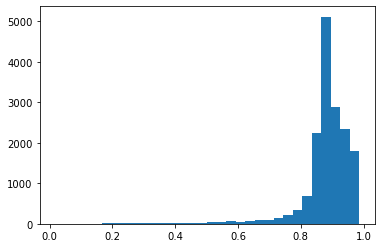

In [48]:
plt.figure()
plt.hist(np.ravel(np.abs(data[-1])),bins=32)
plt.show()

(3001, 128, 128)


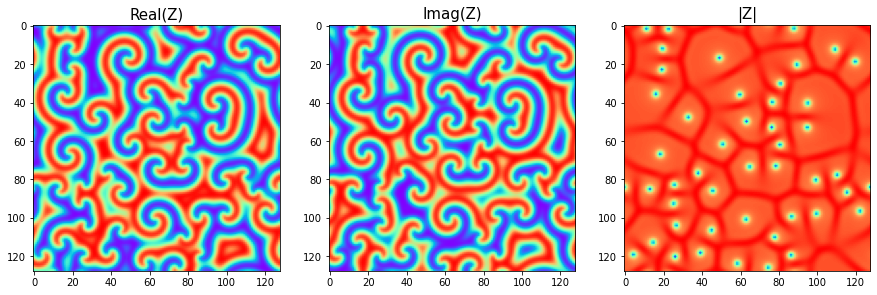

In [5]:
data = np.load("data/withoutNoise/data.npy")
times = np.load("data/withoutNoise/times.npy")

print(data.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.real(data[-1]),cmap='rainbow')
plt.title("Real(Z)",fontsize=15)
plt.subplot(1,3,2)
plt.imshow(np.imag(data[-1]),cmap='rainbow')
plt.title("Imag(Z)",fontsize=15)
plt.subplot(1,3,3)
plt.imshow(np.abs(data[-1]),cmap='rainbow')
plt.title("|Z|",fontsize=15)
plt.show()

In [19]:
rz,iz,mz = [],[],[]
for i in tqdm(range(data.shape[0])):
    rz.append(shannonEntropy(np.real(data[i])))
    iz.append(shannonEntropy(np.imag(data[i])))
    mz.append(shannonEntropy(np.abs(data[i])))
rz,iz,mz = pd.DataFrame(rz),pd.DataFrame(iz),pd.DataFrame(mz)

100%|█████████████████████████████████████| 3001/3001 [00:02<00:00, 1190.36it/s]


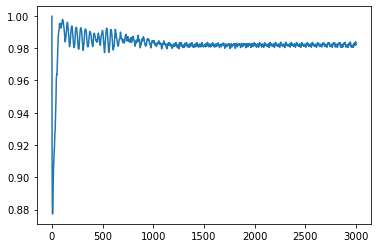

In [20]:
plt.figure()
plt.plot(rz)
plt.show()

In [21]:
rz.to_csv("data/withoutNoise/gpa/entropy.csv", index=False,header=False)

## additive

(3001, 128, 128)


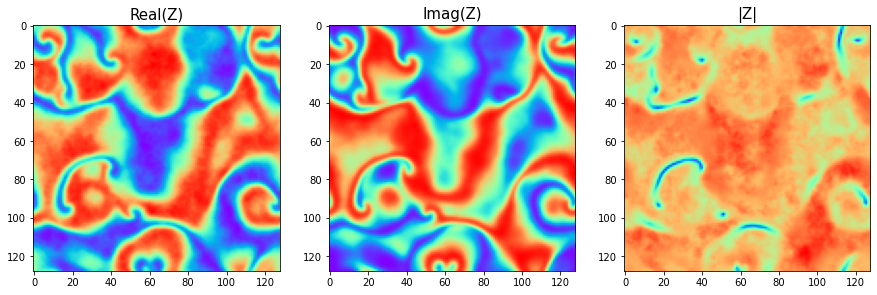

In [22]:
data = np.load("data/additiveNoise/data.npy")
times = np.load("data/additiveNoise/times.npy")

print(data.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.real(data[-1]),cmap='rainbow')
plt.title("Real(Z)",fontsize=15)
plt.subplot(1,3,2)
plt.imshow(np.imag(data[-1]),cmap='rainbow')
plt.title("Imag(Z)",fontsize=15)
plt.subplot(1,3,3)
plt.imshow(np.abs(data[-1]),cmap='rainbow')
plt.title("|Z|",fontsize=15)
plt.show()

In [23]:
rz,iz,mz = [],[],[]
for i in tqdm(range(data.shape[0])):
    rz.append(shannonEntropy(np.real(data[i])))
    iz.append(shannonEntropy(np.imag(data[i])))
    mz.append(shannonEntropy(np.abs(data[i])))
rz,iz,mz = pd.DataFrame(rz),pd.DataFrame(iz),pd.DataFrame(mz)

100%|█████████████████████████████████████| 3001/3001 [00:02<00:00, 1194.79it/s]


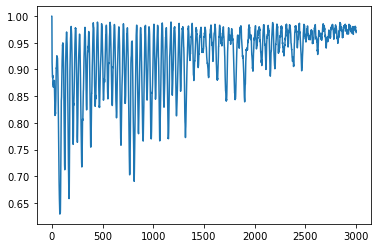

In [24]:
plt.figure()
plt.plot(rz)
plt.show()

In [25]:
rz.to_csv("data/additiveNoise/gpa/entropy.csv", index=False,header=False)

## multiplicative

(3001, 128, 128)


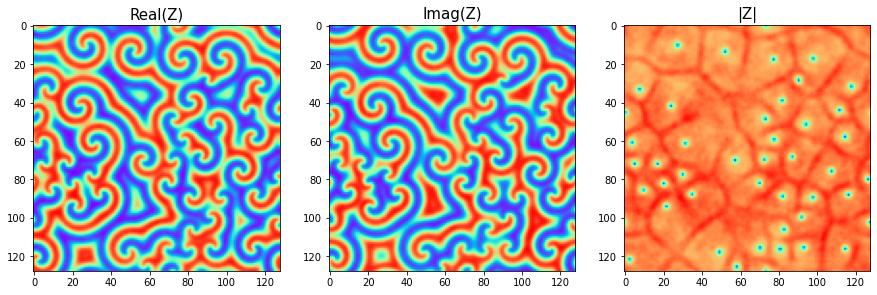

In [4]:
data = np.load("data/multiplicativeNoise/data.npy")
times = np.load("data/multiplicativeNoise/times.npy")

print(data.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.real(data[-1]),cmap='rainbow')
plt.title("Real(Z)",fontsize=15)
plt.subplot(1,3,2)
plt.imshow(np.imag(data[-1]),cmap='rainbow')
plt.title("Imag(Z)",fontsize=15)
plt.subplot(1,3,3)
plt.imshow(np.abs(data[-1]),cmap='rainbow')
plt.title("|Z|",fontsize=15)
plt.show()

In [27]:
rz,iz,mz = [],[],[]
for i in tqdm(range(data.shape[0])):
    rz.append(shannonEntropy(np.real(data[i])))
    iz.append(shannonEntropy(np.imag(data[i])))
    mz.append(shannonEntropy(np.abs(data[i])))
rz,iz,mz = pd.DataFrame(rz),pd.DataFrame(iz),pd.DataFrame(mz)

100%|█████████████████████████████████████| 3001/3001 [00:02<00:00, 1207.35it/s]


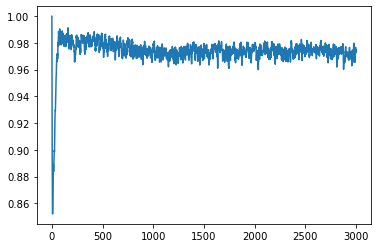

In [28]:
plt.figure()
plt.plot(rz)
plt.show()

In [29]:
rz.to_csv("data/multiplicativeNoise/gpa/entropy.csv", index=False,header=False)

In [6]:
mnh = pd.read_csv("data/multiplicativeNoise/gpa/entropy.csv",header=None)
anh = pd.read_csv("data/additiveNoise/gpa/entropy.csv",header=None)
wnh = pd.read_csv("data/withoutNoise/gpa/entropy.csv",header=None)

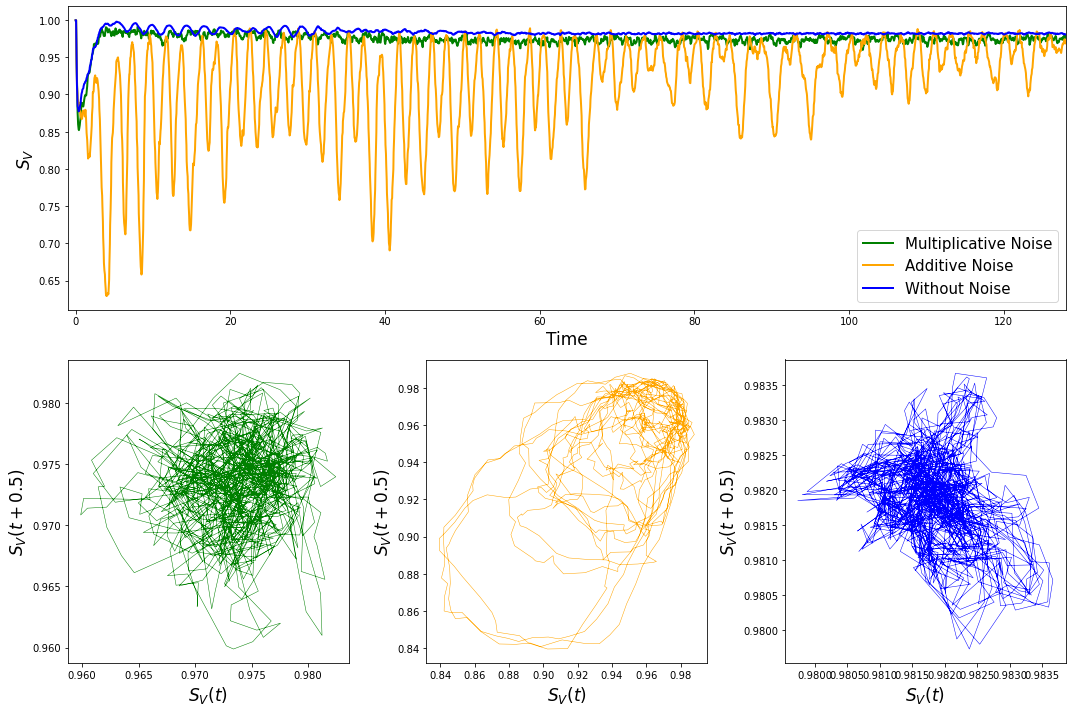

In [17]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2,3)
plt.figure(figsize=(15,10))
plt.subplot(gs[0,:])
plt.plot(times[:2560],mnh.values[:2560],color='green',lw=2,label='Multiplicative Noise')
plt.plot(times[:2560],anh.values[:2560],color='orange',lw=2,label='Additive Noise')
plt.plot(times[:2560],wnh.values[:2560],color='b',lw=2,label='Without Noise')
plt.legend(fontsize=15)
plt.xlabel("Time",fontsize=17)
plt.ylabel("$S_V$",fontsize=17)
#plt.axvline(times[100])
plt.xlim(-1,times[2560])
plt.subplot(gs[1,0])
plt.plot(mnh.values[1510:2560],mnh.values[1500:2550],color='green',lw=0.5)
plt.xlabel("$S_V(t)$",fontsize=17)
plt.ylabel("$S_V(t+0.5)$",fontsize=17)

plt.subplot(gs[1,1])
plt.plot(anh.values[1510:2560],anh.values[1500:2550],color='orange',lw=0.5)
plt.xlabel("$S_V(t)$",fontsize=17)
plt.ylabel("$S_V(t+0.5)$",fontsize=17)

plt.subplot(gs[1,2])
plt.plot(wnh.values[1510:2560],wnh.values[1500:2550],color='blue',lw=0.5)
plt.xlabel("$S_V(t)$",fontsize=17)
plt.ylabel("$S_V(t+0.5)$",fontsize=17)

plt.tight_layout()
plt.show()

# Spectral entropy

(3001, 128, 128)


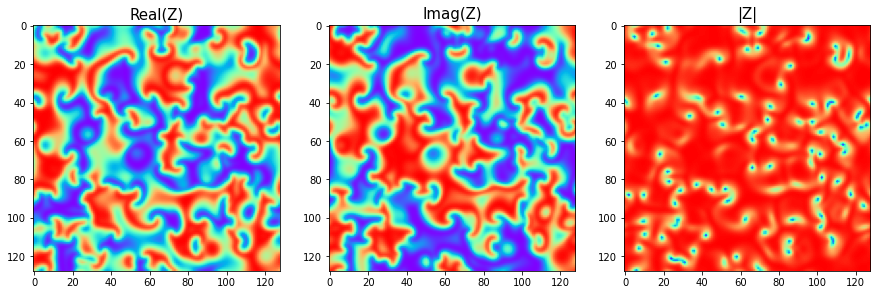

In [3]:
data = np.load("data/withoutNoise/data.npy")
times = np.load("data/withoutNoise/times.npy")

print(data.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.real(data[200]),cmap='rainbow')
plt.title("Real(Z)",fontsize=15)
plt.subplot(1,3,2)
plt.imshow(np.imag(data[200]),cmap='rainbow')
plt.title("Imag(Z)",fontsize=15)
plt.subplot(1,3,3)
plt.imshow(np.abs(data[200]),cmap='rainbow')
plt.title("|Z|",fontsize=15)
plt.show()

In [15]:
rz,iz,mz = [],[],[]
for i in tqdm(range(data.shape[0])):
    rz.append(spectralEntropy(np.real(data[i])))
    iz.append(spectralEntropy(np.imag(data[i])))
    mz.append(spectralEntropy(np.abs(data[i])))
rz,iz,mz = pd.DataFrame(rz),pd.DataFrame(iz),pd.DataFrame(mz)

100%|██████████████████████████████████████| 3001/3001 [00:04<00:00, 600.58it/s]


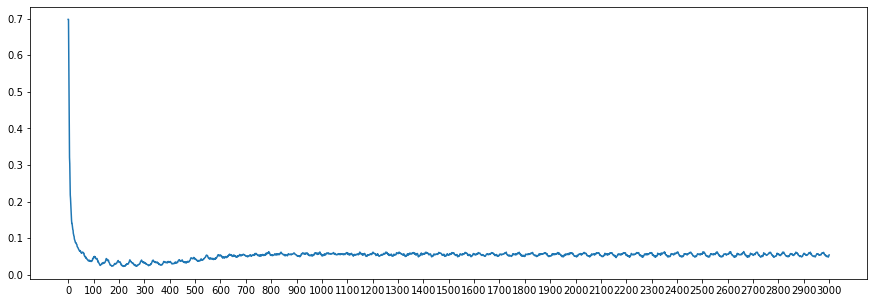

In [26]:
plt.figure(figsize=(15,5))
plt.plot(rz)
plt.xticks(np.arange(0,3100,100))
plt.show()

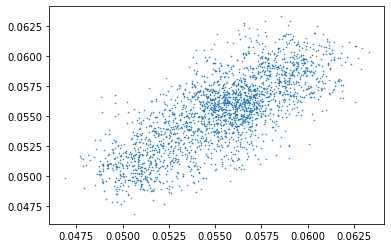

In [39]:
plt.figure()
plt.scatter(rz[700:].values[3:],rz[700:].values[:-3],s=0.3)
plt.show()

In [31]:
rz[:-10]

0
0     0.697961
1     0.697961
2     0.598011
3     0.456504
4     0.375710
...        ...
2986  0.053607
2987  0.052924
2988  0.050670
2989  0.050796
2990  0.049622

[2991 rows x 1 columns]

# Spatial Autocorrelation

In [32]:
def spatialCorrelation(mat,steps = None):
    dx = []
    dy = []
    step=[]
    
    if steps == None:
        s2 = np.arange(1,np.min(mat.shape)//2)
    else:
        s2 = steps
    m2 = mat.copy()
    m = (m2 - np.average(m2))/np.std(m2)
    for s in s2:
        dy.append(np.average(m[s:,:]*m[:-s,:]))
        dx.append(np.average(m[:,s:]*m[:,:-s]))
        step.append(s)
    dx,dy,step = np.array(dx),np.array(dy),np.array(step)
    return dx,dy,step

def temporalCorrelation(mats,steps = None):
    dt = []
    step=[]
    
    if steps == None:
        s2 = np.arange(1,mats.shape[0]//2)
    else:
        s2 = steps
    m2 = mats[:,mats.shape[1]//2,mats.shape[2]//2]
    m = (m2 - np.average(m2))/np.std(m2)
    for s in s2:
        dt.append(np.average(m[s:]*m[:-s]))
        step.append(s)
    dt,step = np.array(dt),np.array(step)
    return dt,step

### Without Noise

In [5]:
data = np.load("data/withoutNoise/data.npy")
times = np.load("data/withoutNoise/times.npy")

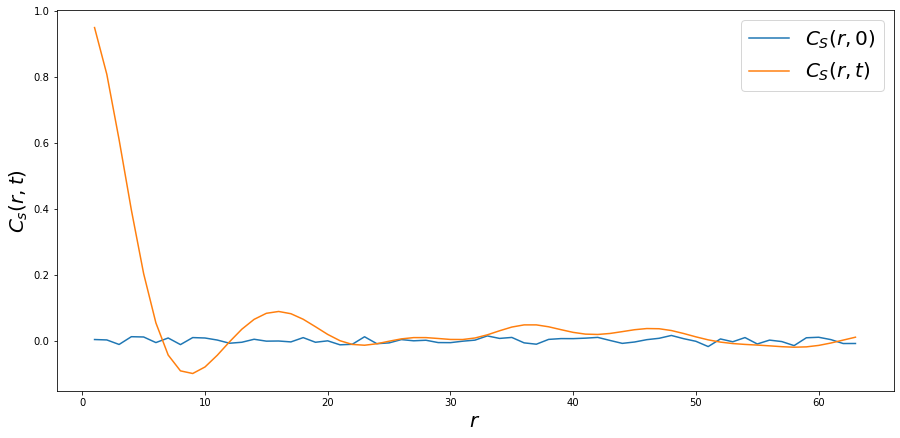

In [28]:
dx0,dy,step = spatialCorrelation(np.real(data[0]))
plt.figure(figsize=(15,7))
plt.plot(step,dx0,label=f'$C_S(r,0)$')
dx,dy,step = spatialCorrelation(np.real(data[-1]))
plt.plot(step,dx,label=f'$C_S(r,t)$')
plt.legend(fontsize=20)
plt.xlabel("$r$",fontsize=20)
plt.ylabel("$C_s(r,t)$",fontsize=20)
plt.show()

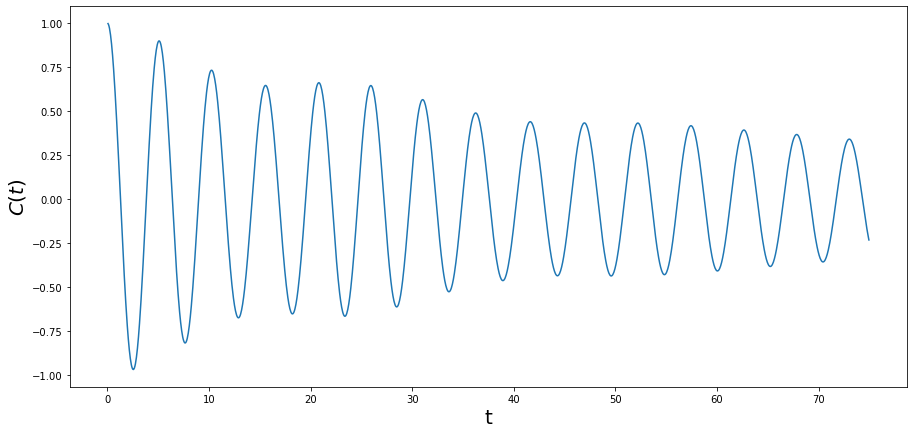

In [35]:
dt,step = temporalCorrelation(np.real(data))
plt.figure(figsize=(15,7))
plt.plot(step*0.05,dt,label=f'$C(t)$')
plt.xlabel("t",fontsize=20)
plt.ylabel("$C(t)$",fontsize=20)
plt.show()

### Additive Noise

In [49]:
data = np.load("data/additiveNoise/data.npy")
times = np.load("data/additiveNoise/times.npy")

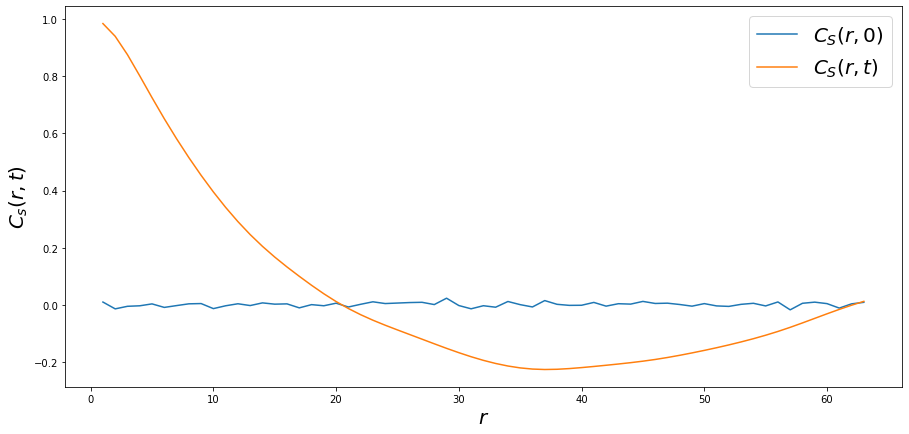

In [50]:
dx0,dy,step = spatialCorrelation(np.real(data[0]))
plt.figure(figsize=(15,7))
plt.plot(step,dx0,label=f'$C_S(r,0)$')
dx,dy,step = spatialCorrelation(np.real(data[-1]))
plt.plot(step,dx,label=f'$C_S(r,t)$')
plt.legend(fontsize=20)
plt.xlabel("$r$",fontsize=20)
plt.ylabel("$C_s(r,t)$",fontsize=20)
plt.show()

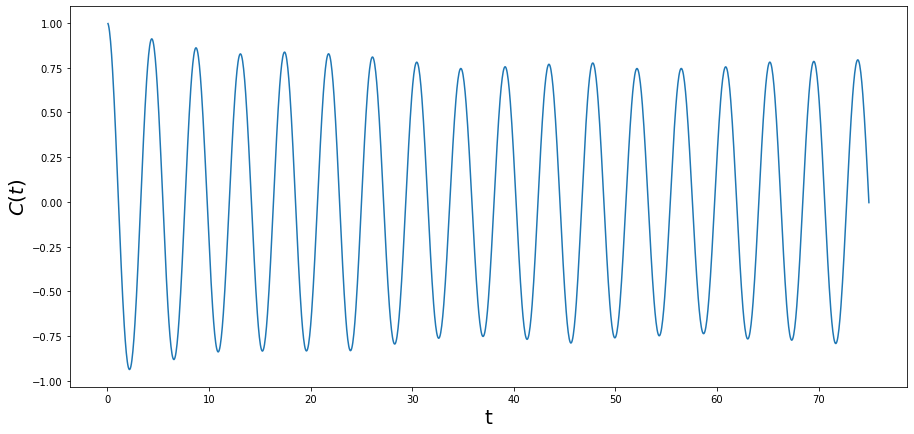

In [51]:
dt,step = temporalCorrelation(np.real(data))
plt.figure(figsize=(15,7))
plt.plot(step*0.05,dt,label=f'$C(t)$')
plt.xlabel("t",fontsize=20)
plt.ylabel("$C(t)$",fontsize=20)
plt.show()

### Multplicative Noise

In [53]:
data = np.load("data/multiplicativeNoise/data.npy")
times = np.load("data/multiplicativeNoise/times.npy")

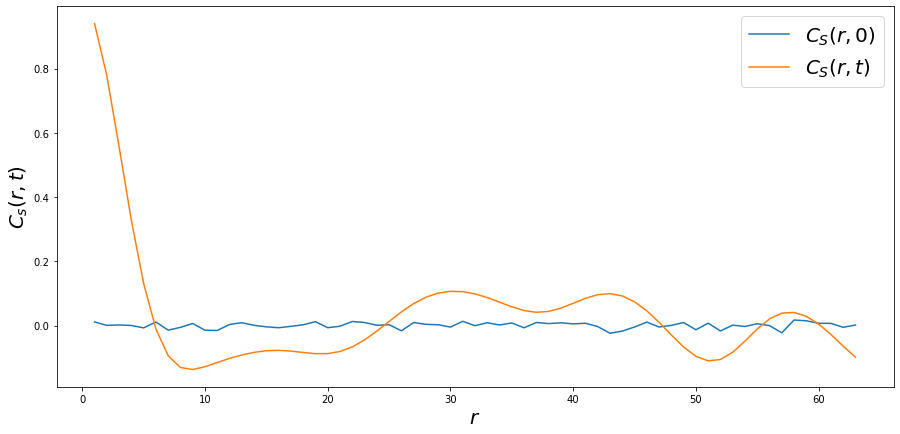

In [54]:
dx0,dy,step = spatialCorrelation(np.real(data[0]))
plt.figure(figsize=(15,7))
plt.plot(step,dx0,label=f'$C_S(r,0)$')
dx,dy,step = spatialCorrelation(np.real(data[-1]))
plt.plot(step,dx,label=f'$C_S(r,t)$')
plt.legend(fontsize=20)
plt.xlabel("$r$",fontsize=20)
plt.ylabel("$C_s(r,t)$",fontsize=20)
plt.show()

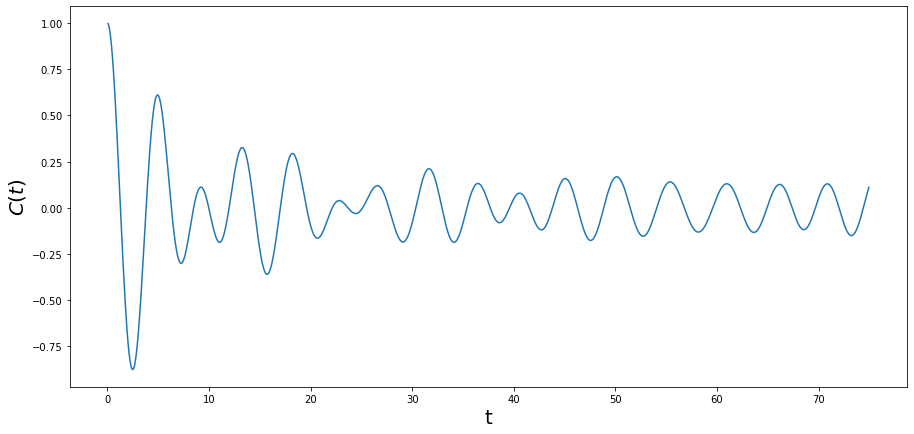

In [55]:
dt,step = temporalCorrelation(np.real(data))
plt.figure(figsize=(15,7))
plt.plot(step*0.05,dt,label=f'$C(t)$')
plt.xlabel("t",fontsize=20)
plt.ylabel("$C(t)$",fontsize=20)
plt.show()